<br>

<br>

# 💳 **BANK FRAUD DETECTION** 💳

<br>

**MODEL**

<br>

## **INDEX**

- **🧠 STEP 1: PROBLEM DEFINITION**
- **🎣 STEP 2: DATA COLLECTION**
- **🔎 STEP 3: EXPLORATORY DATA ANALYSIS (EDA)**


<br>

<br>

# **🧠 STEP 1: PROBLEM DEFINITION**


In today's digital banking landscape, credit card fraud continues to be a persistent threat, resulting in significant financial losses and operational risks for financial institutions. Detecting fraudulent transactions is a complex task, especially due to their rarity and the evolving nature of fraud patterns.

This project aims to build a **machine learning model to detect credit card fraud** using a realistic, synthetic dataset provided by **Feedzai** (published at NeurIPS 2022). Although the data is synthetic, it has been generated to reflect the structure and behavior of real-world fraud cases, providing a robust environment for model development and evaluation.

The dataset is:
- **Highly imbalanced**, with less than 10% of records labeled as fraud.
- **Bias-controlled**, with multiple variants designed to test model fairness and robustness.
- **Rich in features**, including both numerical and categorical variables.
- **Time-aware**, with a `month` column, though this project will not focus on temporal modeling.

### 💼 BUSINESS CONTEXT

The target user of this model is a **fraud analyst working at a bank**. Rather than being deployed in real-time production, the model is intended to serve as an analytical tool to help prioritize suspicious transactions and guide human decision-making.

### 🎯 PROJECT GOAL

The primary goal is to **maximize fraud detection capability** (high recall), while keeping false positives under control (F1-score). The model should identify fraudulent behavior patterns to help reduce financial losses without overwhelming analysts with irrelevant alerts.

<br>


<br>

<br>

# **🎣 STEP 2: DATA COLLECTION**

<br>

### **IMPORTING LIBRARIES**

In [3]:
import pandas as pd
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Kaggle dataset identifier
dataset_identifier = "sgpjesus/bank-account-fraud-dataset-neurips-2022"

# Download the dataset using the Kaggle API
os.system(f'kaggle datasets download -d {dataset_identifier}')

0

### **SELECTIVE EXTRACTION**

In [5]:
# Name of the ZIP file (based on the dataset identifier)
zip_filename = dataset_identifier.split('/')[-1] + ".zip"

# Check if the ZIP file exists and extract only the Base.csv file
if os.path.exists(zip_filename):
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        # List all files in the ZIP
        files_in_zip = zip_ref.namelist()
        
        # Check if Base.csv is in the ZIP file
        if "Base.csv" in files_in_zip:
            # Extract only Base.csv
            zip_ref.extract("Base.csv", ".")
            print("Base.csv has been successfully extracted!")
        else:
            print("Base.csv not found in the ZIP file.")
else:
    print("The downloaded ZIP file was not found.")

Base.csv has been successfully extracted!


<br>

<br>

<br>

# **🔎 STEP 3: EXPLORATORY DATA ANALYSIS (EDA)**

### **LOADING THE DATASET**

In [6]:
df = pd.read_csv("Base.csv")
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [8]:
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

In [9]:
print("Dataset shape:", df.shape)

Dataset shape: (1000000, 32)


In [10]:
df.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


<br>

### **CHECK FOR MISSING VALUES**

In [12]:
# Total missing values per column
missing_values = df.isnull().sum()

# Display only columns with missing data
missing_values[missing_values > 0]
#print(missing_values)

Series([], dtype: int64)

In [13]:
missing_percent = df.isnull().mean() * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

fraud_bool                          0.0
income                              0.0
name_email_similarity               0.0
prev_address_months_count           0.0
current_address_months_count        0.0
customer_age                        0.0
days_since_request                  0.0
intended_balcon_amount              0.0
payment_type                        0.0
zip_count_4w                        0.0
velocity_6h                         0.0
velocity_24h                        0.0
velocity_4w                         0.0
bank_branch_count_8w                0.0
date_of_birth_distinct_emails_4w    0.0
employment_status                   0.0
credit_risk_score                   0.0
email_is_free                       0.0
housing_status                      0.0
phone_home_valid                    0.0
phone_mobile_valid                  0.0
bank_months_count                   0.0
has_other_cards                     0.0
proposed_credit_limit               0.0
foreign_request                     0.0


In [14]:
missing_percent = df.isnull().mean() * 100
missing_percent [missing_percent > 0].sort_values(ascending = False)


Series([], dtype: float64)

### 🔍 Check for Explicit Missing Values (NaN)

We confirmed that the dataset does not contain any `NaN` values. All missing or invalid values are encoded using special values like `-1`, `-170`, or other impossible entries. These will be treated in the preprocessing stage.

This check was kept in the notebook as part of the standard EDA process.


<br>

### **3.3. TARGET VARIABLE DISTRIBUTION `fraud_bool`**


The goal of this step is to examine the distribution of our target variable, `fraud_bool`, which indicates whether a transaction is fraudulent (`1`) or legitimate (`0`).

This is a **binary classification problem**, and understanding the proportion of fraud cases is essential to:

- **Quantify class imbalance** and its severity.
- Justify the choice of appropriate evaluation metrics (e.g. recall, F1-score).
- Prepare for strategies to address imbalance during the modeling phase (e.g. resampling, class weights).

Based on earlier summary statistics, we expect a **very low fraud rate (~1.1%)**, which is typical in real-world fraud detection.

In this step, we will:
1. Count the number of fraudulent vs. non-fraudulent transactions.
2. Calculate the class distribution percentages.
3. Visualize the imbalance using a bar chart.

This analysis will serve as a key reference when evaluating model performance and designing preprocessing strategies.

C:\Users\Jen\AppData\Local\Temp\ipykernel_13820\1569826673.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="viridis")


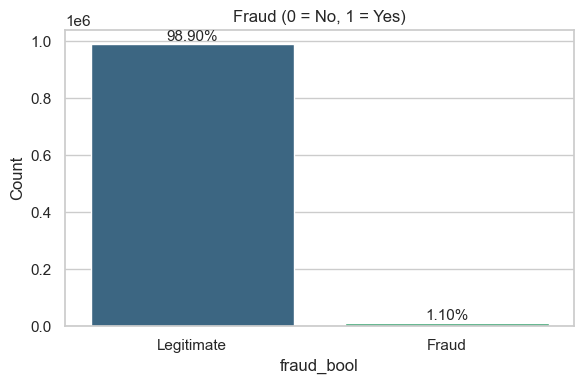

In [16]:
# Clean style
sns.set(style="whitegrid")

# Count the values of the target variable
fraud_counts = df["fraud_bool"].value_counts().sort_index()

# Calculate percentages
fraud_percent = df["fraud_bool"].value_counts(normalize=True).sort_index() * 100

# Bar plot of the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="viridis")

# Annotate bars with percentages
for i, count in enumerate(fraud_counts.values):
    pct = fraud_percent.values[i]
    plt.text(i, count + 500, f"{pct:.2f}%", ha='center', va='bottom', fontsize=11)

# Formatting
plt.title("Distribution of Target Variable: fraud_bool", fontsize=14)
plt.title("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0,1], ["Legitimate", "Fraud"])
plt.tight_layout()
plt.show()


